In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.svm import SVC

# TODO START

In [2]:
# TODO  Генерация выборки с 3 классами и 2 признаками
X, y = make_classification(
    n_samples=300,
    n_features=2,
    n_redundant=0,
    n_informative=2,
    n_clusters_per_class=1,
    n_classes=3,
    random_state=42
)

In [3]:
# TODO Обучение SVM
clf = SVC(kernel='linear', decision_function_shape='ovr')
clf.fit(X, y)

# 3. Параметры модели
print("Коэффициенты (clf.coef_):")
print(clf.coef_)  # shape: (3, 2)
print("\nСвободные члены (clf.intercept_):")
print(clf.intercept_)  # shape: (3,)

Коэффициенты (clf.coef_):
[[-2.40711105 -0.45327035]
 [-1.0166258   2.61296835]
 [ 2.01482812  0.99557583]]

Свободные члены (clf.intercept_):
[ 0.29651827 -2.22532693  0.47317062]


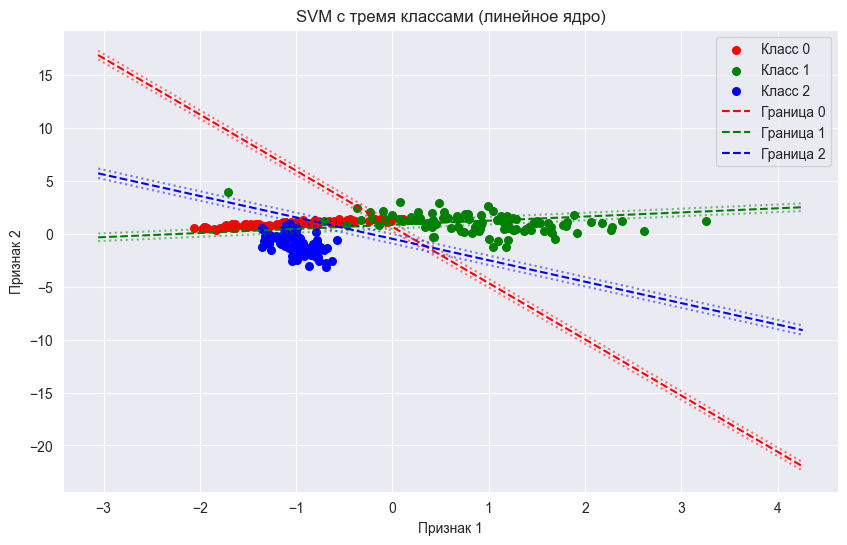

In [4]:
# TODO Визуализация
plt.figure(figsize=(10, 6))
colors = ['red', 'green', 'blue']
labels = ['Класс 0', 'Класс 1', 'Класс 2']

# Точки
for i in range(3):
    plt.scatter(X[y == i, 0], X[y == i, 1], c=colors[i], label=labels[i], s=30)

# Линии разделяющих плоскостей
x_vals = np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 500)

for i in range(3):
    w = clf.coef_[i]
    b = clf.intercept_[i]
    y_vals = -(w[0] * x_vals + b) / w[1]
    margin = 1 / np.linalg.norm(w)
    y_margin_up = y_vals + margin
    y_margin_down = y_vals - margin

    plt.plot(x_vals, y_vals, '--', color=colors[i], label=f'Граница {i}')
    plt.plot(x_vals, y_margin_up, ':', color=colors[i], alpha=0.5)
    plt.plot(x_vals, y_margin_down, ':', color=colors[i], alpha=0.5)

plt.xlabel('Признак 1')
plt.ylabel('Признак 2')
plt.title('SVM с тремя классами (линейное ядро)')
plt.legend()
plt.grid(True)
plt.show()
